# Explorando a biblioteca Pandas

Referências:

https://github.com/guipsamora/pandas_exercises

https://pandas.pydata.org/docs/user_guide/10min.html#min

https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook

## Obtenção e exploração de bases de dados


### 1. Importar a biblioteca

In [4]:
import pandas as pd
import numpy as np

### 02. Importar os dados os dados deste link:

https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

**Observe que é um tsv e não um csv**

In [59]:
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", delimiter='\t')

### 03. Verificar os 10 primeiros dados

In [3]:
df.head(10)

order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   
5  [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...    $10.98   
6                                                NaN     $1.69   
7  [Tomatillo Red Chili Salsa, [Fajita Vegetables...    $11.75   
8  [Tomatillo Green Chili Salsa, [Pinto Beans, Ch...     $9.25   
9  [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...     $9.25

### 04. Verificar os últimos registros

In [4]:
df.tail()

order_id  quantity           item_name  \
4617      1833         1       Steak Burrito   
4618      1833         1       Steak Burrito   
4619      1834         1  Chicken Salad Bowl   
4620      1834         1  Chicken Salad Bowl   
4621      1834         1  Chicken Salad Bowl   

                                     choice_description item_price  
4617  [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...    $11.75   
4618  [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...    $11.75   
4619  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...    $11.25   
4620  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...     $8.75   
4621  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...     $8.75

### 05. Exbir número de linhas e colunas

In [5]:
df.shape

(4622, 5)

### 06. Tipos de dados

In [6]:
df.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

### 07. Informações sobre o índice do dataframe

In [10]:
print("Índice:", df.index)
print("Nome do índice:", df.index.name)
print("Valores do índice:", df.index.values)
print("Tipo de dados do índice:", df.index.dtype)

Índice: RangeIndex(start=0, stop=4622, step=1)
Nome do índice: None
Valores do índice: [   0    1    2 ... 4619 4620 4621]
Tipo de dados do índice: int64


### 09. Exibir nome das colunas

In [11]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### 08. Informações gerais do dataframe (índice, colunas, tipos de dados, etc)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### 09. Utilize a função apply para alterar tipo de dado da coluna 'item_price' para float.

In [18]:
df['item_price'] = df['item_price'].apply(lambda x: float(x.replace('$','')))
df

order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description  item_price  
0                                                   NaN        2.39  
1                                          [Clementine]        3.39  
2                                               [Apple]        3.39  
3                                                   NaN        2.39  
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
...                                                 ...         ...  
4617  [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...       11.75  
4618  [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...       11.75  
4619  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...       11.25  
4620  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...        8.75  
4621  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...        8.75  

[4622 rows x 5 columns]

### 10. Quantos itens foram vendidos no total?

In [20]:
print(f"Total itens vendidos: {df.quantity.sum()}")

Total itens vendidos: 4972


### 11. Qual a receita total obtida?

In [22]:
rec_tot = df['quantity'].mul(df['item_price']).sum()
print("Receita total:", rec_tot)

Receita total: 39237.02


### 12. Quantos pedidos foram realizados? (existe função pandas para isso)

In [26]:
tot_ped = df.order_id.nunique()
print("Total de pedidos:", tot_ped)

Total de pedidos: 1834


### 13. Qual são os 5 produtos mais populares entre os clientes (aparecem em mais pedidos)?

In [29]:
df.item_name.value_counts().head(5)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

### 14. Sumarizar distribuição dos dados da base

In [30]:
df.describe()

order_id     quantity   item_price
count  4622.000000  4622.000000  4622.000000
mean    927.254868     1.075725     7.464336
std     528.890796     0.410186     4.245557
min       1.000000     1.000000     1.090000
25%     477.250000     1.000000     3.390000
50%     926.000000     1.000000     8.750000
75%    1393.000000     1.000000     9.250000
max    1834.000000    15.000000    44.250000

### 15. Sumarizar uma coluna em específico

In [31]:
df.item_price.describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

### 16. Checar números de dados ausentes por coluna

In [32]:
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

### 17. Exibir percentual de dados ausentes por coluna

In [33]:
(df.isnull().sum() / len(df)) * 100

order_id               0.000000
quantity               0.000000
item_name              0.000000
choice_description    26.958027
item_price             0.000000
dtype: float64

### 18. Substituir valores ausentes da coluna 'choice_description' por '-'

In [35]:
df.choice_description = df.choice_description.fillna('-')
df

order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description  item_price  
0                                                     -        2.39  
1                                          [Clementine]        3.39  
2                                               [Apple]        3.39  
3                                                     -        2.39  
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
...                                                 ...         ...  
4617  [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...       11.75  
4618  [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...       11.75  
4619  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...       11.25  
4620  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...        8.75  
4621  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...        8.75  

[4622 rows x 5 columns]

### 19. Remova o valor da coluna 'quantity' das 10 primeiras linhas e substitua as 5 primeiras pela moda e as demais pela média dos valores da coluna.

In [58]:
med = df.quantity.loc[:9].mean()
mod = df.quantity.loc[:9].mode()[0]
df.loc[:4, 'quantity'] = mod
df.loc[5:9, 'quantity'] = med
df.head(10)

order_id  quantity                              item_name  \
0         1      1.00           Chips and Fresh Tomato Salsa   
1         1      1.00                                   Izze   
2         1      1.00                       Nantucket Nectar   
3         1      1.00  Chips and Tomatillo-Green Chili Salsa   
4         2      1.00                           Chicken Bowl   
5         3      1.05                           Chicken Bowl   
6         3      1.05                          Side of Chips   
7         4      1.05                          Steak Burrito   
8         4      1.05                       Steak Soft Tacos   
9         5      1.05                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   
5  [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...    $10.98   
6                                                NaN     $1.69   
7  [Tomatillo Red Chili Salsa, [Fajita Vegetables...    $11.75   
8  [Tomatillo Green Chili Salsa, [Pinto Beans, Ch...     $9.25   
9  [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...     $9.25

## Filtragem e ordenação


### 20. Transformar um dicionário em um dataframe

In [5]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

df1 = pd.DataFrame(raw_data)
df1

regiment company  deaths  battles  size  veterans  armored  deserters  \
0   Nighthawks     1st     523        5  1045         1        1          4   
1   Nighthawks     1st      52       42   957         5        0         24   
2   Nighthawks     2nd      25        2  1099        62        1         31   
3   Nighthawks     2nd     616        2  1400        26        1          2   
4     Dragoons     1st      43        4  1592        73        0          3   
5     Dragoons     1st     234        7  1006        37        1          4   
6     Dragoons     2nd     523        8   987       949        0         24   
7     Dragoons     2nd      62        3   849        48        1         31   
8       Scouts     1st      62        4   973        48        0          2   
9       Scouts     1st      73        7  1005       435        0          3   
10      Scouts     2nd      37        8  1099        63        1          2   
11      Scouts     2nd      35        9  1523       345        1          3   

        origin  
0      Arizona  
1   California  
2        Texas  
3      Florida  
4        Maine  
5         Iowa  
6       Alaska  
7   Washington  
8       Oregon  
9      Wyoming  
10    Louisana  
11     Georgia

### 21. Traduzir nome das colunas

In [6]:
tradutor = {
    'regiment': 'regimento',
    'company': 'companhia',
    'deaths': 'mortes',
    'battles': 'batalhas',
    'size': 'tamanho',
    'veterans': 'veteranos',
    'armored': 'blindados',
    'deserters': 'desertores',
    'origin': 'origem'
}

df1 = df1.rename(columns=tradutor)
df1

regimento companhia  mortes  batalhas  tamanho  veteranos  blindados  \
0   Nighthawks       1st     523         5     1045          1          1   
1   Nighthawks       1st      52        42      957          5          0   
2   Nighthawks       2nd      25         2     1099         62          1   
3   Nighthawks       2nd     616         2     1400         26          1   
4     Dragoons       1st      43         4     1592         73          0   
5     Dragoons       1st     234         7     1006         37          1   
6     Dragoons       2nd     523         8      987        949          0   
7     Dragoons       2nd      62         3      849         48          1   
8       Scouts       1st      62         4      973         48          0   
9       Scouts       1st      73         7     1005        435          0   
10      Scouts       2nd      37         8     1099         63          1   
11      Scouts       2nd      35         9     1523        345          1   

    desertores      origem  
0            4     Arizona  
1           24  California  
2           31       Texas  
3            2     Florida  
4            3       Maine  
5            4        Iowa  
6           24      Alaska  
7           31  Washington  
8            2      Oregon  
9            3     Wyoming  
10           2    Louisana  
11           3     Georgia

### 22. Definir a coluna 'origem' como índice

In [7]:
df1 = df1.set_index('origem')
df1

regimento companhia  mortes  batalhas  tamanho  veteranos  \
origem                                                                   
Arizona     Nighthawks       1st     523         5     1045          1   
California  Nighthawks       1st      52        42      957          5   
Texas       Nighthawks       2nd      25         2     1099         62   
Florida     Nighthawks       2nd     616         2     1400         26   
Maine         Dragoons       1st      43         4     1592         73   
Iowa          Dragoons       1st     234         7     1006         37   
Alaska        Dragoons       2nd     523         8      987        949   
Washington    Dragoons       2nd      62         3      849         48   
Oregon          Scouts       1st      62         4      973         48   
Wyoming         Scouts       1st      73         7     1005        435   
Louisana        Scouts       2nd      37         8     1099         63   
Georgia         Scouts       2nd      35         9     1523        345   

            blindados  desertores  
origem                             
Arizona             1           4  
California          0          24  
Texas               1          31  
Florida             1           2  
Maine               0           3  
Iowa                1           4  
Alaska              0          24  
Washington          1          31  
Oregon              0           2  
Wyoming             0           3  
Louisana            1           2  
Georgia             1           3

### 23. Exibir o número de veteranos por estado

In [8]:
# Fiz o groupby só para demonstrar. Não precisava, pois os estados não se repetem
df1.groupby(df1.index)['veteranos'].sum()

origem
Alaska        949
Arizona         1
California      5
Florida        26
Georgia       345
Iowa           37
Louisana       63
Maine          73
Oregon         48
Texas          62
Washington     48
Wyoming       435
Name: veteranos, dtype: int64

### 24. Exibir o número de veteranos e mortos por estado ordenados pelo número de mortes em ordem decrescente.

In [13]:
df1[['veteranos','mortes']].sort_values(by=['mortes'], ascending=[False])

veteranos  mortes
origem                       
Florida            26     616
Arizona             1     523
Alaska            949     523
Iowa               37     234
Wyoming           435      73
Washington         48      62
Oregon             48      62
California          5      52
Maine              73      43
Louisana           63      37
Georgia           345      35
Texas              62      25

### 25. Selecionar as colunas 'tamanho', 'veteranos' e 'desertores' dos estados Maine e Alaska.

In [14]:
df1.loc[['Maine','Alaska'],['tamanho','veteranos','desertores']]

tamanho  veteranos  desertores
origem                                
Maine      1592         73           3
Alaska      987        949          24

### 26. Selecionar as linhas de 3 a 7 e as colunas de 3 a 6

In [18]:
df1.iloc[3:8,3:7]

batalhas  tamanho  veteranos  blindados
origem                                             
Florida            2     1400         26          1
Maine              4     1592         73          0
Iowa               7     1006         37          1
Alaska             8      987        949          0
Washington         3      849         48          1

### 27. Selecionar todas as linhas após a 4º com todas as colunas

In [20]:
df1.iloc[5:,]

regimento companhia  mortes  batalhas  tamanho  veteranos  \
origem                                                                 
Iowa        Dragoons       1st     234         7     1006         37   
Alaska      Dragoons       2nd     523         8      987        949   
Washington  Dragoons       2nd      62         3      849         48   
Oregon        Scouts       1st      62         4      973         48   
Wyoming       Scouts       1st      73         7     1005        435   
Louisana      Scouts       2nd      37         8     1099         63   
Georgia       Scouts       2nd      35         9     1523        345   

            blindados  desertores  
origem                             
Iowa                1           4  
Alaska              0          24  
Washington          1          31  
Oregon              0           2  
Wyoming             0           3  
Louisana            1           2  
Georgia             1           3

### 28. Selecionar as 4 primeiras linhas com todas as colunas

In [21]:
df1.iloc[:5,]

regimento companhia  mortes  batalhas  tamanho  veteranos  \
origem                                                                   
Arizona     Nighthawks       1st     523         5     1045          1   
California  Nighthawks       1st      52        42      957          5   
Texas       Nighthawks       2nd      25         2     1099         62   
Florida     Nighthawks       2nd     616         2     1400         26   
Maine         Dragoons       1st      43         4     1592         73   

            blindados  desertores  
origem                             
Arizona             1           4  
California          0          24  
Texas               1          31  
Florida             1           2  
Maine               0           3

### 29. Selecionar da 3º até a 7º coluna

In [24]:
df1.iloc[:,3:8]

batalhas  tamanho  veteranos  blindados  desertores
origem                                                         
Arizona            5     1045          1          1           4
California        42      957          5          0          24
Texas              2     1099         62          1          31
Florida            2     1400         26          1           2
Maine              4     1592         73          0           3
Iowa               7     1006         37          1           4
Alaska             8      987        949          0          24
Washington         3      849         48          1          31
Oregon             4      973         48          0           2
Wyoming            7     1005        435          0           3
Louisana           8     1099         63          1           2
Georgia            9     1523        345          1           3

###30. Selecionar as linhas cujo número de mortes seja superior a 50, ordenados pelas colunas "regimento" e "companhia"


In [26]:
df1.loc[df1['mortes'] > 50].sort_values(by=['regimento', 'companhia'])

regimento companhia  mortes  batalhas  tamanho  veteranos  \
origem                                                                   
Iowa          Dragoons       1st     234         7     1006         37   
Alaska        Dragoons       2nd     523         8      987        949   
Washington    Dragoons       2nd      62         3      849         48   
Arizona     Nighthawks       1st     523         5     1045          1   
California  Nighthawks       1st      52        42      957          5   
Florida     Nighthawks       2nd     616         2     1400         26   
Oregon          Scouts       1st      62         4      973         48   
Wyoming         Scouts       1st      73         7     1005        435   

            blindados  desertores  
origem                             
Iowa                1           4  
Alaska              0          24  
Washington          1          31  
Arizona             1           4  
California          0          24  
Florida             1           2  
Oregon              0           2  
Wyoming             0           3

### 31. Selecionar as linhas cujo número de mortes seja maior que 50 e menor que 500 e ordená-las do menor número para o maior.

In [31]:
df1.loc[(df1['mortes'] > 50) & (df1['mortes'] < 500)].sort_values(by=['mortes'], ascending=[True])

regimento companhia  mortes  batalhas  tamanho  veteranos  \
origem                                                                   
California  Nighthawks       1st      52        42      957          5   
Washington    Dragoons       2nd      62         3      849         48   
Oregon          Scouts       1st      62         4      973         48   
Wyoming         Scouts       1st      73         7     1005        435   
Iowa          Dragoons       1st     234         7     1006         37   

            blindados  desertores  
origem                             
California          0          24  
Washington          1          31  
Oregon              0           2  
Wyoming             0           3  
Iowa                1           4

### 32. Selecionar exércitos de todos os regimentos exceto os "Dragoons"

In [30]:
df1.loc[df1['regimento'] != 'Dragoons']

regimento companhia  mortes  batalhas  tamanho  veteranos  \
origem                                                                   
Arizona     Nighthawks       1st     523         5     1045          1   
California  Nighthawks       1st      52        42      957          5   
Texas       Nighthawks       2nd      25         2     1099         62   
Florida     Nighthawks       2nd     616         2     1400         26   
Oregon          Scouts       1st      62         4      973         48   
Wyoming         Scouts       1st      73         7     1005        435   
Louisana        Scouts       2nd      37         8     1099         63   
Georgia         Scouts       2nd      35         9     1523        345   

            blindados  desertores  
origem                             
Arizona             1           4  
California          0          24  
Texas               1          31  
Florida             1           2  
Oregon              0           2  
Wyoming             0           3  
Louisana            1           2  
Georgia             1           3

### 33. Selecionar as linhas denominadas "Texas" e "Arizona"

In [32]:
df1.loc[['Texas','Arizona'],:]

regimento companhia  mortes  batalhas  tamanho  veteranos  \
origem                                                                
Texas    Nighthawks       2nd      25         2     1099         62   
Arizona  Nighthawks       1st     523         5     1045          1   

         blindados  desertores  
origem                          
Texas            1          31  
Arizona          1           4

### 34. Selecionar a 3º célula da linha denominada Arizona.

In [35]:
df1.loc['Arizona'].iloc[2]

523

### 35. Selecione a 3º célula da coluna "mortes"

In [36]:
df1['mortes'].iloc[2]

25

## Agrupando dados



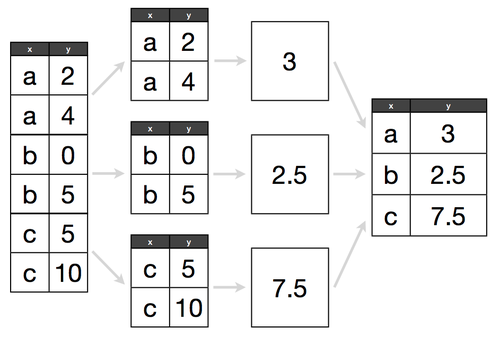

### 36. Importar dados deste link: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv

In [38]:
df2 = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv", delimiter=',')

### 37. Exibir as informações gerais do dataframe

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


### 38. Qual continente consome mais cerveja em média?

In [42]:
print("O continente que consome mais cerveja em média é:", df2.groupby('continent')['beer_servings'].mean().idxmax())

O continente que consome mais cerveja em média é: EU


### 39. Para cada continente, exiba as estatísticas de consumo de vinho.

In [43]:
df2.groupby('continent')['wine_servings'].describe()

count        mean        std  min   25%    50%     75%    max
continent                                                               
AF          53.0   16.264151  38.846419  0.0   1.0    2.0   13.00  233.0
AS          44.0    9.068182  21.667034  0.0   0.0    1.0    8.00  123.0
EU          45.0  142.222222  97.421738  0.0  59.0  128.0  195.00  370.0
OC          16.0   35.625000  64.555790  0.0   1.0    8.5   23.25  212.0
SA          12.0   62.416667  88.620189  1.0   3.0   12.0   98.50  221.0

### 40. Exibir a média de consumo de cada bebida por continente.

In [57]:
df2[['continent', 'beer_servings',	'spirit_servings',	'wine_servings']].groupby('continent').mean()

#ou df2.groupby('continent')[['beer_servings',	'spirit_servings',	'wine_servings']].mean()

beer_servings  spirit_servings  wine_servings
continent                                               
AF             61.471698        16.339623      16.264151
AS             37.045455        60.840909       9.068182
EU            193.777778       132.555556     142.222222
OC             89.687500        58.437500      35.625000
SA            175.083333       114.750000      62.416667

### 41. Exibir os valores mínimo, médio e máximo de consumo de litros de puro álcool por continente. Dica: pesquise a função agg() da biblioteca Pandas

In [58]:
df2[['continent','total_litres_of_pure_alcohol']].groupby('continent').agg(['min', 'mean', 'max'])
#ou df2.groupby('continent')['total_litres_of_pure_alcohol'].agg(['min', 'mean', 'max'])

total_litres_of_pure_alcohol                
                                   min      mean   max
continent                                             
AF                                 0.0  3.007547   9.1
AS                                 0.0  2.170455  11.5
EU                                 0.0  8.617778  14.4
OC                                 0.0  3.381250  10.4
SA                                 3.8  6.308333   8.3

### 42. Exibir a quantitade de países, a média e a mediana do consumo de cada bebida e o somatório do total de litros de álcool por continente.  Dica: pesquise a função agg() da biblioteca Pandas


In [59]:
dic_argumentos = {
    'country': 'count',
    'beer_servings': ['mean', 'median'],
    'spirit_servings': ['mean', 'median'],
    'wine_servings': ['mean', 'median'],
    'total_litres_of_pure_alcohol': 'sum'
}

df2.groupby('continent').agg(dic_argumentos)

country beer_servings        spirit_servings        wine_servings  \
            count          mean median            mean median          mean   
continent                                                                     
AF             53     61.471698   32.0       16.339623    3.0     16.264151   
AS             44     37.045455   17.5       60.840909   16.0      9.068182   
EU             45    193.777778  219.0      132.555556  122.0    142.222222   
OC             16     89.687500   52.5       58.437500   37.0     35.625000   
SA             12    175.083333  162.5      114.750000  108.5     62.416667   

                 total_litres_of_pure_alcohol  
          median                          sum  
continent                                      
AF           2.0                        159.4  
AS           1.0                         95.5  
EU         128.0                        387.8  
OC           8.5                         54.1  
SA          12.0                         75.7